In [33]:
import sys

sys.path.append('../../MembraneQuant')
from membranequant import *

%matplotlib notebook

In [36]:
basepath = '/Users/blandt/Desktop/Data/PAR2 RING mutants experiment 2/'

## AF calibration

<IPython.core.display.Javascript object>


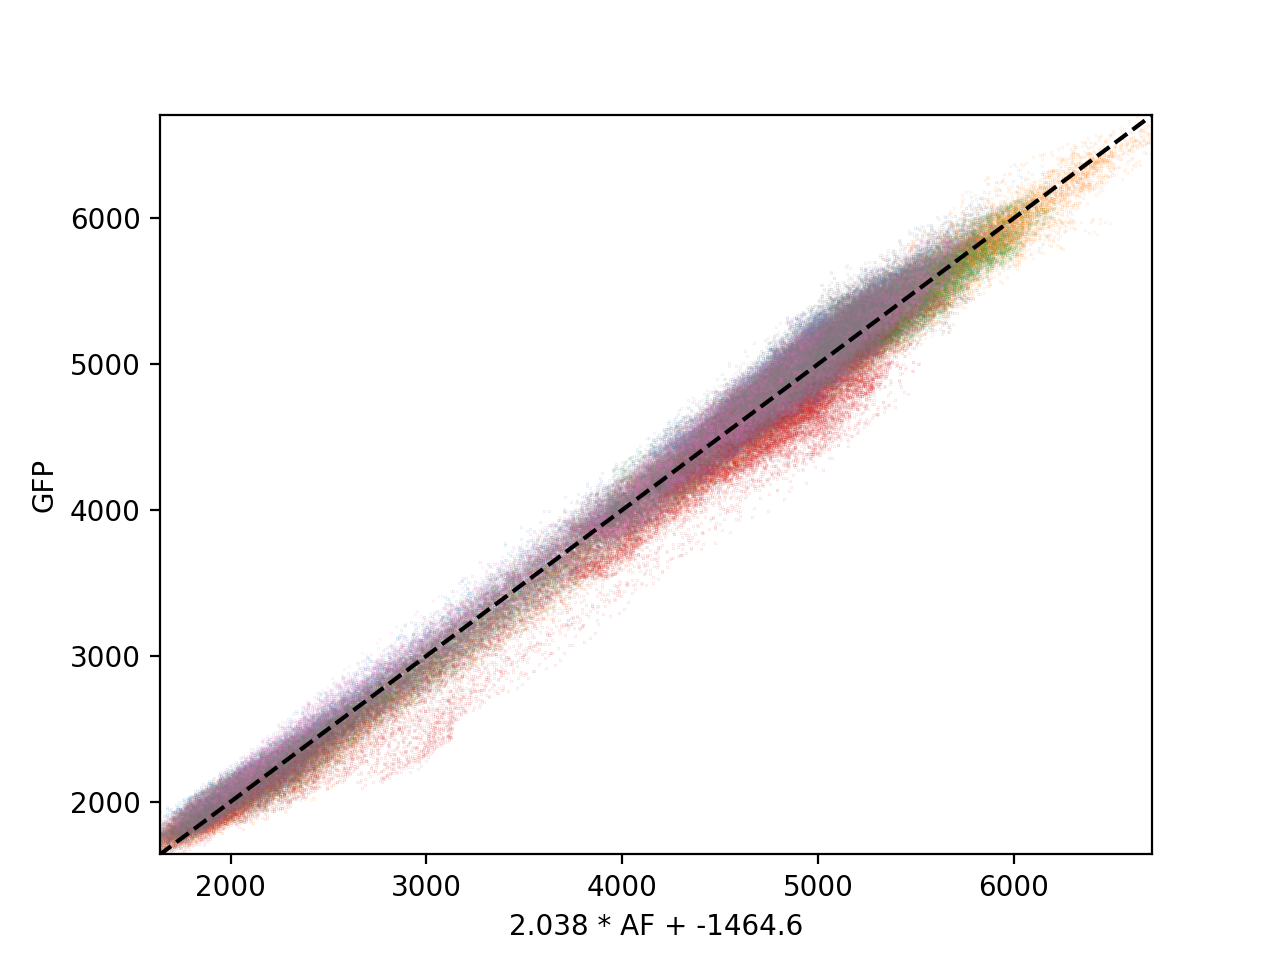

[2.0384553869364295, -1464.5710512524965]


In [38]:
n2_paths = direcslist(basepath, 1, exclusive=['_n2_',])

af2 = AfCorrelation(n2_paths, sigma=2, expand=10, method='OLS')
af2.run()
af2.plot_prediction()
print(af2.params)

<IPython.core.display.Javascript object>


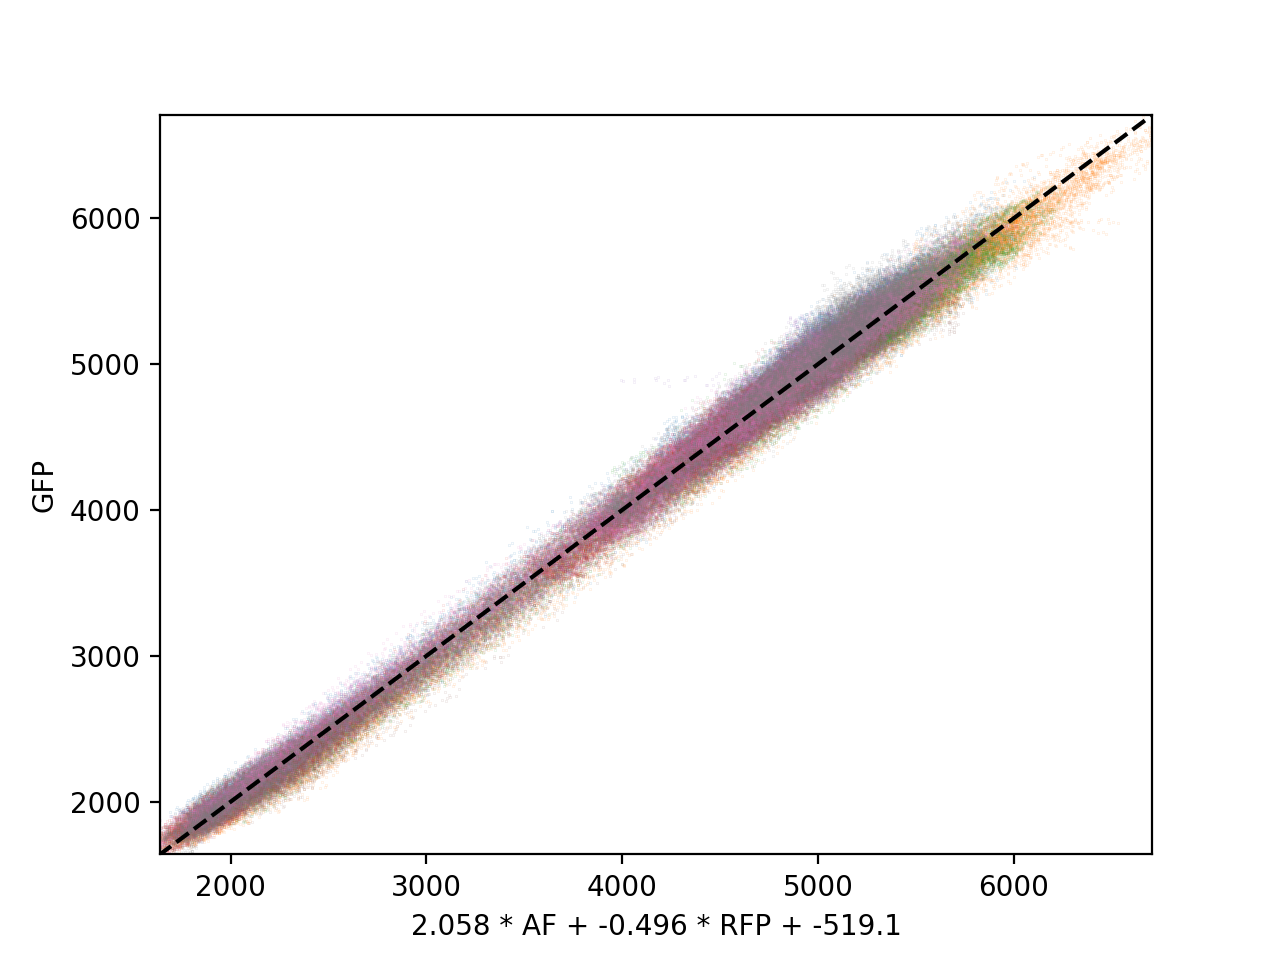

[2.0584418172839474, -0.49616311435213484, -519.1367679475406]


In [39]:
af3 = AfCorrelation(n2_paths, rfp_regex='*561 SP 630-75*', sigma=2, expand=10, method='OLS')
af3.run()
af3.plot_prediction()
print(af3.params)

## AF correction

In [31]:
for p in direcslist(basepath, 1):
    ch1 = load_image(glob.glob(p + '/*488 SP 535-50*')[0])
    ch2 = load_image(glob.glob(p + '/*488 SP 630-75*')[0])
    ch3 = load_image(glob.glob(p + '/*561 SP 630-75*')[0])
    
    af_corrected2 = af_subtraction(ch1, ch2, *af2.params)
    af_corrected3 = af_subtraction_3channel(ch1, ch2, ch3, *af3.params)
    
    save_img(af_corrected2, p + '/af_corrected.tif')
    save_img(af_corrected3, p + '/af_corrected_3channel.tif')